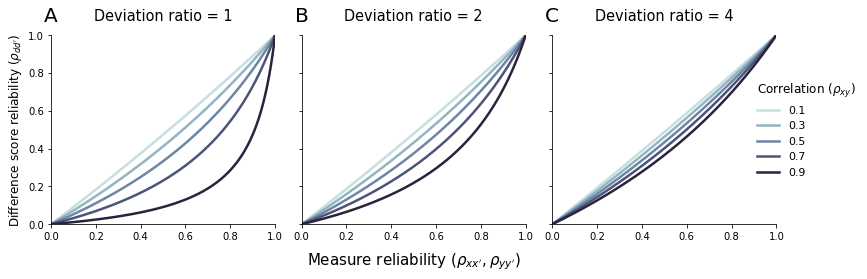

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import dirname
ROOT_DIR = dirname(os.path.realpath('__file__'))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define measure parameters.
rho_xx = rho_yy = np.linspace(0,1,1001)    # Task measure reliability
rho_tt = np.linspace(0.1,0.9,5)            # Task measure correlation
ratios = [1,2,4]                           # Task measure variance ratio
 
## Define plotting paramters.
palette = sns.color_palette("ch:start=.2,rot=-.3", n_colors=rho_tt.size, desat=0.8)
annots = ['A','B','C'] 
    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, axes = plt.subplots(1, len(ratios), figsize=(len(ratios)*4, 4), sharex=True, sharey=True)

## Main loop.
for i, (ax, ratio, annot) in enumerate(zip(axes, ratios, annots)):

    ## Define task variances.
    sigma_x = 1; sigma_y = sigma_x * ratio

    ## Compute observed correlations.
    rho_xy = np.outer(np.sqrt(rho_xx * rho_yy), rho_tt)
    
    ## Compute reliability.
    a = (sigma_x**2 * rho_xx + sigma_y**2 * rho_yy)[:,np.newaxis] - 2 * rho_xy * sigma_x * sigma_y
    b = sigma_x**2 + sigma_y**2 - 2 * rho_xy * sigma_x * sigma_y
    reliability = a / b

    ## Plot reliability.
    for rel, label, color in zip(reliability.T, rho_tt, palette): 
        ax.plot(rho_xx, rel, lw=2.5, label='%0.1f' %label, color=color)

    ## Add detail.
    ax.set(xlim=(0,1), ylim=(0,1))
    ax.set_title(f"Deviation ratio = {ratio}", fontsize=14.5, pad=15)
    ax.annotate(annot, (0,0), (0,1.05), 'axes fraction', ha='center', va='bottom', fontsize=20)
    if not i: ax.set_ylabel(r"Difference score reliability ($\rho_{dd'}$)", fontsize=12)
    if i==1: ax.set_xlabel(r"Measure reliability ($\rho_{xx'}, \rho_{yy'}$)", fontsize=15, labelpad=10)
        
## Add legend.
legend = ax.legend(loc=7, bbox_to_anchor=(1.4,0.5), frameon=False, fontsize=11, 
                   title=r'Correlation ($\rho_{xy}$)')
plt.setp(legend.get_title(), fontsize=12)
legend._legend_box.align = "left"

## Save figure.
sns.despine()
plt.tight_layout()
plt.savefig(os.path.join(ROOT_DIR, 'figures', 'fig03.png'), transparent=True, dpi=100)